# Data Analysis

In [208]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from windrose import WindroseAxes
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

In [117]:
# Importing the dataset
df = pd.read_csv('Kaggle_Turbine_Data.csv', parse_dates=['Observation'])
df.head(2)

,Observation,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [118]:
# Dropping the columns that are not required
df.drop(["Observation", "ReactivePower", "WTG"], axis=1, inplace=True)
df.head(2)

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,RotorRPM,TurbineStatus,WindDirection,WindSpeed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
# Analysing the dataset
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,16.273495,6.574653e+07,357.000000,22.970893


In [120]:
# Analyzing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   94750 non-null  float64
 1   AmbientTemperatue             93817 non-null  float64
 2   BearingShaftTemperature       62518 non-null  float64
 3   Blade1PitchAngle              41996 non-null  float64
 4   Blade2PitchAngle              41891 non-null  float64
 5   Blade3PitchAngle              41891 non-null  float64
 6   ControlBoxTemperature         62160 non-null  float64
 7   GearboxBearingTemperature     62540 non-null  float64
 8   GearboxOilTemperature         62438 non-null  float64
 9   GeneratorRPM                  62295 non-null  float64
 10  GeneratorWinding1Temperature  62427 non-null  float64
 11  GeneratorWinding2Temperature  62449 non-null  float64
 12  HubTemperature                62406 non-null  float64
 13 

In [121]:
# Renaming Ambient Temperature column
df.rename(columns={'AmbientTemperatue': 'AmbientTemperature'}, inplace=True)

In [122]:
# Comparing column values for Blade2PitchAngle and Blade3PitchAngle
df['Blade2PitchAngle'].equals(df['Blade3PitchAngle'])

True

In [123]:
# Droping the column Blade3PitchAngle
df.drop(["Blade3PitchAngle"], axis=1, inplace=True)

In [124]:
# Comparing column values for NacellePosition and WindDirection
df['NacellePosition'].equals(df['WindDirection'])

True

In [125]:
# Droping the column NacellePosition
df.drop(["NacellePosition"], axis=1, inplace=True)

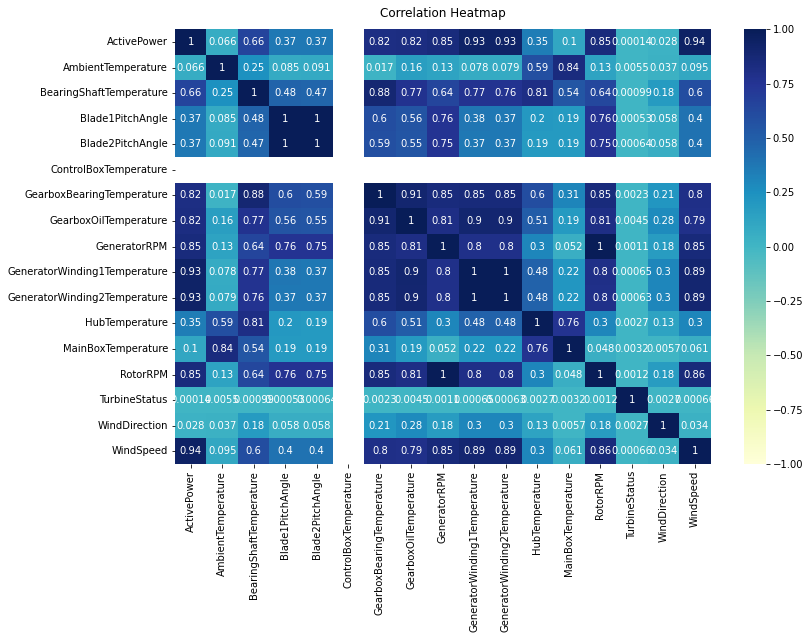

In [126]:
# Create and visualise correlation matrix
corr_matrix = df.corr().abs()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

# Regression - Predicting Active Power output

In [45]:
# Creating copy of dataset for Regression analysis
df_reg = df.copy()
df_reg = df_reg[["ActivePower", "AmbientTemperature", "WindSpeed", "WindDirection", "Blade2PitchAngle", "TurbineStatus"]]
df_reg.columns

Index(['ActivePower', 'AmbientTemperature', 'WindSpeed', 'WindDirection',
       'Blade2PitchAngle', 'TurbineStatus'],
      dtype='object')

In [46]:
# Count the number of missing values in each column
df_reg.isnull().sum()

ActivePower           23474
AmbientTemperature    24407
WindSpeed             23629
WindDirection         45946
Blade2PitchAngle      76333
TurbineStatus         55316
dtype: int64

In [47]:
# Dropping rows with missing values
df_reg.dropna(axis=0, inplace=True)
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32954 entries, 70789 to 118223
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ActivePower         32954 non-null  float64
 1   AmbientTemperature  32954 non-null  float64
 2   WindSpeed           32954 non-null  float64
 3   WindDirection       32954 non-null  float64
 4   Blade2PitchAngle    32954 non-null  float64
 5   TurbineStatus       32954 non-null  float64
dtypes: float64(6)
memory usage: 1.8 MB


In [48]:
# Function to group wind direction into 12 bins for every 30 degrees
def wind_direction(x):
    list = []
    i = 15
    while i <= 375:
        list.append(i)
        i += 30
        
    for i in list:
        if x < i:
            x = i - 15
            if x == 360:
                return 0
            else:
                return x
            
# Function to convert bins into wind rose categories
def wind_rose(x):
    if x==0:
        return "N"
    if x==30:
        return "NNE"
    if x==60:
        return "NEE" 
    if x==90:
        return "E" 
    if x==120:
        return "SEE" 
    if x==150:
        return "SSE" 
    if x==180:
        return "S" 
    if x==210:
        return "SSW" 
    if x==240:
        return "SWW" 
    if x==270:
        return "W" 
    if x==300:
        return "NWW" 
    if x==330:
        return "NNW"
    
# Function to categories turbine status
def turbine_fault(x):
    if x < 3.1:
        return 0
    else:
        return 1

In [49]:
# Applying the function to WindDirection column
df_reg["WindDirection_360"] = df_reg["WindDirection"].apply(wind_direction)

In [50]:
# Checking WindDirection_360 column
df_reg.WindDirection_360.value_counts()

180    10794
150     6009
0       4168
330     4121
210     2211
240     1419
120     1137
30       798
270      652
300      645
90       550
60       450
Name: WindDirection_360, dtype: int64

In [51]:
# Drop rows with wind speed of Null
df_reg.dropna(subset=["WindSpeed"], axis=0, inplace=True)

In [52]:
# Applying the function to TurbineFault column
df_reg["TurbineFault"] = df_reg["TurbineStatus"].apply(turbine_fault)

In [53]:
# Checking dataset values
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32954 entries, 70789 to 118223
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ActivePower         32954 non-null  float64
 1   AmbientTemperature  32954 non-null  float64
 2   WindSpeed           32954 non-null  float64
 3   WindDirection       32954 non-null  float64
 4   Blade2PitchAngle    32954 non-null  float64
 5   TurbineStatus       32954 non-null  float64
 6   WindDirection_360   32954 non-null  int64  
 7   TurbineFault        32954 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 2.3 MB


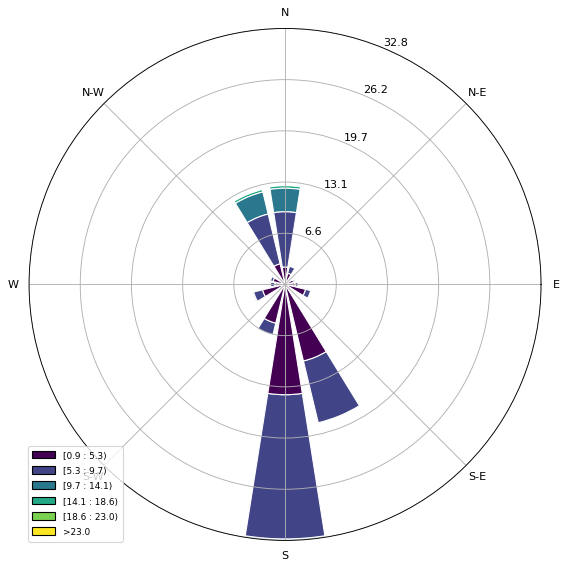

In [54]:
# Visualise Wind Speed and Wind Direction using WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df_reg["WindDirection_360"], df_reg["WindSpeed"], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.show()

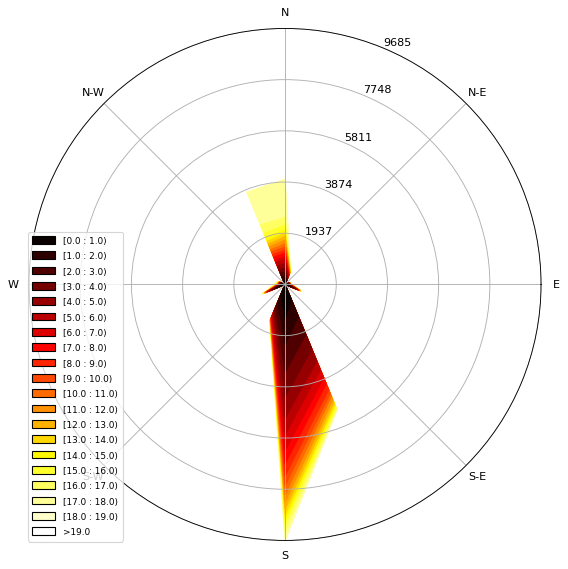

In [55]:
# Visualise Active Power and Wind Direction using WindroseAxes
ax = WindroseAxes.from_ax()
ax.contourf(df_reg["WindDirection_360"], df_reg["ActivePower"] / 100, bins=np.arange(0, 20, 1), cmap=cm.hot)
ax.set_legend()
plt.show()

In [56]:
# Categorise Wind Direction as per above Wind Rose
df_reg["WindDirection_360"] = df_reg["WindDirection_360"].apply(wind_rose)

In [57]:
# Dropping Turbine Status and Wind Direction columns
df_reg.drop(["WindDirection", "TurbineStatus"], axis=1, inplace=True)
df_reg.head(10)

,ActivePower,AmbientTemperature,WindSpeed,Blade2PitchAngle,WindDirection_360,TurbineFault
70789,-7.851491,39.308243,2.212693,43.699357,NNE,0
70791,-5.565284,39.206277,2.130019,41.260230,NEE,0
70793,-5.549332,39.194184,2.347810,39.576122,NEE,0
70794,-5.768376,38.992667,2.161460,48.299502,E,1
70795,-5.091456,38.686212,1.913490,50.363691,SSE,1
70796,-5.542307,38.792036,2.393622,41.869653,SEE,0
70798,-5.495585,38.872741,2.321825,35.143688,SEE,0
70799,-4.806118,38.925343,1.909285,49.225043,E,0
70801,-4.561916,39.010695,1.563294,84.999664,E,1
70802,-4.787421,38.919999,1.479235,84.999664,E,1


In [58]:
# Number of records in df_reg
df_reg.shape

(32954, 6)

In [59]:
# Dropping rows with Active Power with negative values
df_reg = df_reg[df_reg["ActivePower"] >= 0]
df_reg.shape

(27525, 6)

In [60]:
# Apply one-hot encoder
df_reg = pd.get_dummies(df_reg)
df_reg.head(10)

,ActivePower,AmbientTemperature,WindSpeed,Blade2PitchAngle,TurbineFault,WindDirection_360_E,WindDirection_360_N,WindDirection_360_NEE,WindDirection_360_NNE,WindDirection_360_NNW,WindDirection_360_NWW,WindDirection_360_S,WindDirection_360_SEE,WindDirection_360_SSE,WindDirection_360_SSW,WindDirection_360_SWW,WindDirection_360_W
70811,474.565555,36.586867,6.065840,3.192279,0,0,0,0,0,0,0,0,0,0,0,0,1
70812,589.893812,36.170749,5.952220,-0.493883,0,0,0,0,0,0,0,0,0,0,0,1,0
70813,298.980465,35.616976,5.084325,-0.252921,0,0,0,0,0,0,0,0,0,0,0,1,0
70814,525.028383,35.549396,6.069695,-0.482359,0,0,0,0,0,0,0,0,0,0,0,1,0
70815,672.400830,35.720460,6.742415,-0.562525,0,0,0,0,0,0,0,0,0,0,0,1,0
70816,446.690640,35.672370,5.567256,-0.233296,0,0,0,0,0,0,0,0,0,0,0,1,0
70819,420.465210,35.548910,5.501770,-0.496171,0,0,0,0,0,0,0,0,0,0,0,0,1
70822,303.334982,35.475355,4.848700,-0.132051,0,0,0,0,0,0,0,0,0,0,0,0,1
70823,329.956512,35.366150,5.148190,-0.111449,0,0,0,0,0,0,0,0,0,0,0,0,1
70824,528.480127,35.243461,5.533625,-0.423335,0,0,0,0,0,0,0,0,0,0,0,0,1


In [61]:
# Numeric values analysis
df_reg.describe()

,ActivePower,AmbientTemperature,WindSpeed,Blade2PitchAngle,TurbineFault,WindDirection_360_E,WindDirection_360_N,WindDirection_360_NEE,WindDirection_360_NNE,WindDirection_360_NNW,WindDirection_360_NWW,WindDirection_360_S,WindDirection_360_SEE,WindDirection_360_SSE,WindDirection_360_SSW,WindDirection_360_SWW,WindDirection_360_W
count,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000,27525.000000
mean,726.421910,28.164529,6.491756,3.657430,0.022525,0.009628,0.144414,0.007920,0.020200,0.137330,0.011262,0.351862,0.025104,0.186449,0.055404,0.035459,0.014968
std,584.896634,4.061745,2.379457,12.136338,0.148386,0.097649,0.351516,0.088643,0.140686,0.344201,0.105527,0.477560,0.156445,0.389475,0.228772,0.184939,0.121428
min,0.000000,19.208737,1.518316,-0.934926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.911070,24.924098,4.726322,-0.479547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,544.905298,27.774884,6.058458,0.169787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1222.029291,30.991616,7.842545,2.133308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1779.032433,41.809714,22.970893,88.768470,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


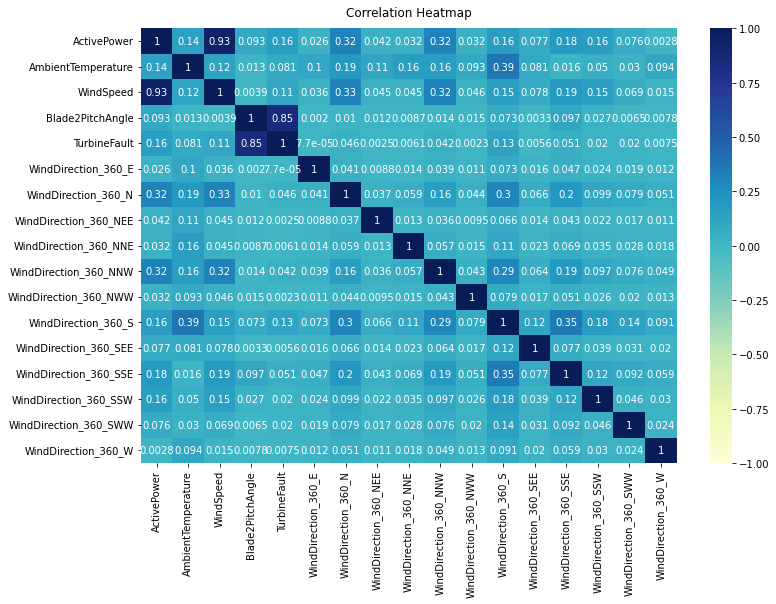

In [62]:
# Create and visualise correlation matrix
corr_matrix_reg = df_reg.corr().abs()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix_reg, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

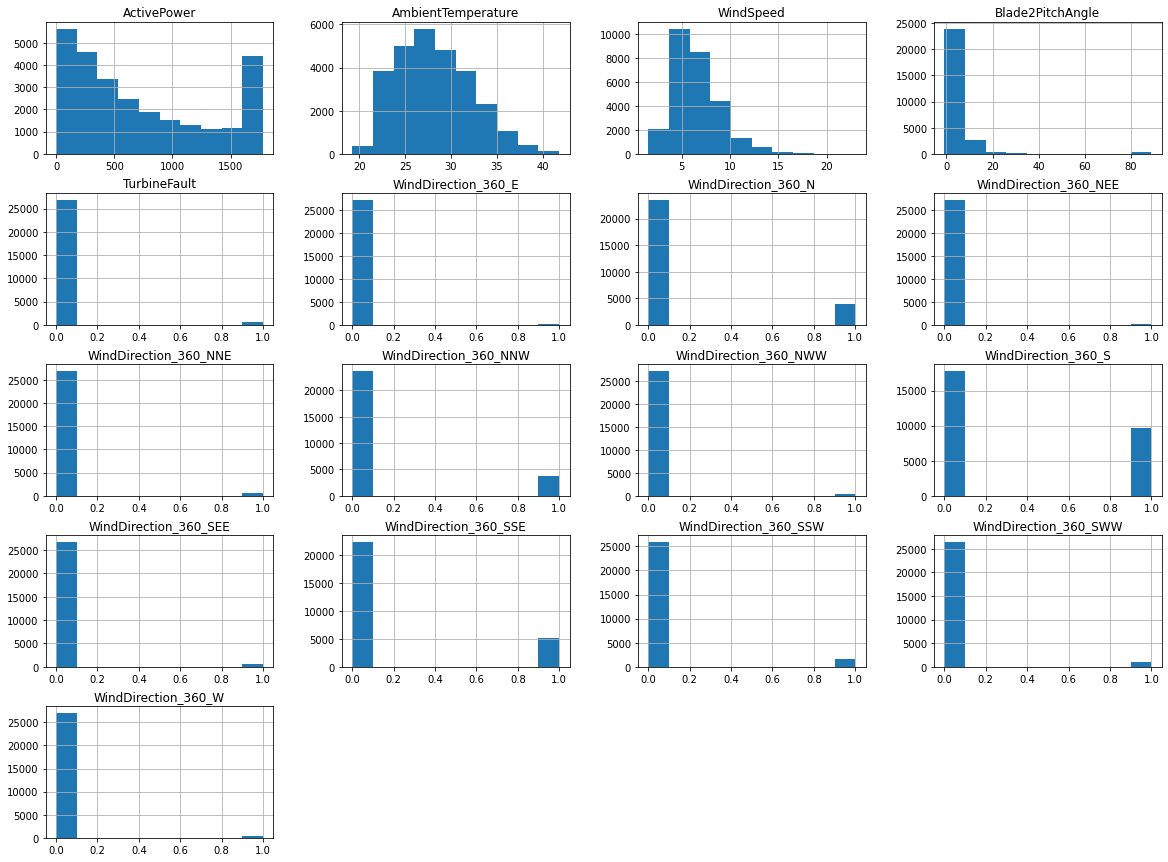

In [63]:
# Data distribution charts
df_reg.hist(figsize=(20, 15))
plt.show()

### Model 1

In [64]:
# Creating label and features
y = df_reg["ActivePower"]
X = df_reg.drop(["ActivePower"], axis=1)

In [73]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(27525, 22020, 5505, 27525, 22020, 5505)

In [74]:
# Create neural network model with 2 hidden layers
tf.random.set_seed(42)
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [75]:
# Compile the model with SGD optimizer
model1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [76]:
# Fit the model
history1 = model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
689/689 [==============================] - 3s 3ms/step - loss: 277.1355 - mae: 277.1355
Epoch 2/100
689/689 [==============================] - 2s 3ms/step - loss: 201.3140 - mae: 201.3140
Epoch 3/100
689/689 [==============================] - 2s 2ms/step - loss: 193.0296 - mae: 193.0296
Epoch 4/100
689/689 [==============================] - 2s 3ms/step - loss: 190.3919 - mae: 190.3919
Epoch 5/100
689/689 [==============================] - 2s 3ms/step - loss: 185.7986 - mae: 185.7986
Epoch 6/100
689/689 [==============================] - 2s 3ms/step - loss: 185.5227 - mae: 185.5227
Epoch 7/100
689/689 [==============================] - 2s 3ms/step - loss: 185.9093 - mae: 185.9093
Epoch 8/100
689/689 [==============================] - 2s 3ms/step - loss: 179.4578 - mae: 179.4578
Epoch 9/100
689/689 [==============================] - 2s 2ms/step - loss: 181.7191 - mae: 181.7191
Epoch 10/100
689/689 [==============================] - 2s 2ms/step - loss: 182.7274 - mae: 182.7274

Text(0.5, 0, 'epochs')

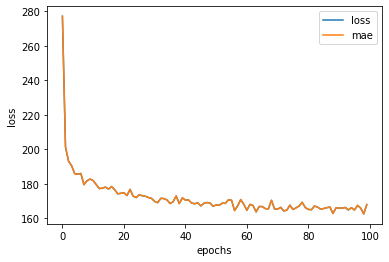

In [77]:
# Visualise the model's loss
pd.DataFrame(history1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [82]:
# Predict test results
y_pred1 = model1.predict(X_test)
y_pred1[:10]

173/173 [==============================] - 1s 2ms/step


array([[ 371.31635],
       [ 839.87   ],
       [ 164.96936],
       [ 469.9575 ],
       [-198.03906],
       [ 981.16113],
       [ 204.31735],
       [ 266.5023 ],
       [2300.069  ],
       [1766.79   ]], dtype=float32)

In [84]:
# Calculate the mean absolute error, mean squared error and root mean squared error
mae1 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred1))
mse1 = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred1))
rmse1 = tf.sqrt(mse1)

mae1, mse1, rmse1

(<tf.Tensor: shape=(), dtype=float32, numpy=273.20605>,
 <tf.Tensor: shape=(), dtype=float32, numpy=113963.586>,
 <tf.Tensor: shape=(), dtype=float32, numpy=337.58493>)

### Model 2

In [78]:
# Create neural network model with 3 hidden layers
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [79]:
# Compile the model with Adam optimizer
model2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

In [80]:
# Fit the model
history2 = model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
689/689 [==============================] - 2s 2ms/step - loss: 395.9496 - mae: 395.9496
Epoch 2/100
689/689 [==============================] - 1s 2ms/step - loss: 168.0084 - mae: 168.0084
Epoch 3/100
689/689 [==============================] - 2s 2ms/step - loss: 160.7666 - mae: 160.7666
Epoch 4/100
689/689 [==============================] - 2s 2ms/step - loss: 155.8961 - mae: 155.8961
Epoch 5/100
689/689 [==============================] - 1s 2ms/step - loss: 151.8301 - mae: 151.8301
Epoch 6/100
689/689 [==============================] - 1s 2ms/step - loss: 148.1338 - mae: 148.1338
Epoch 7/100
689/689 [==============================] - 1s 2ms/step - loss: 144.1163 - mae: 144.1163
Epoch 8/100
689/689 [==============================] - 1s 2ms/step - loss: 141.4409 - mae: 141.4409
Epoch 9/100
689/689 [==============================] - 1s 2ms/step - loss: 138.3922 - mae: 138.3922
Epoch 10/100
689/689 [==============================] - 1s 2ms/step - loss: 136.8465 - mae: 136.8465

Text(0.5, 0, 'epochs')

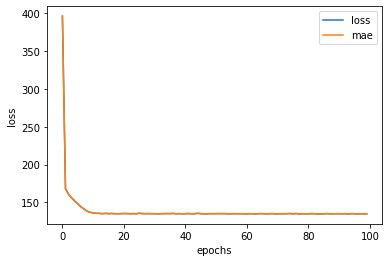

In [106]:
# Visualise the model's loss
pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [85]:
# Predict test results
y_pred2 = model2.predict(X_test)
y_pred2[:10]

173/173 [==============================] - 0s 2ms/step


array([[ 555.2538 ],
       [1140.9839 ],
       [ 356.7457 ],
       [ 673.77246],
       [-128.71414],
       [1307.8127 ],
       [ 360.09433],
       [ 530.09717],
       [3043.734  ],
       [2357.4595 ]], dtype=float32)

In [86]:
# Calculate the mean absolute error, mean squared error and root mean squared error
mae2 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred2))
mse2 = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred2))
rmse2 = tf.sqrt(mse2)

mae2, mse2, rmse2

(<tf.Tensor: shape=(), dtype=float32, numpy=133.6276>,
 <tf.Tensor: shape=(), dtype=float32, numpy=50211.477>,
 <tf.Tensor: shape=(), dtype=float32, numpy=224.07918>)

### Model 3

In [89]:
# Checking the dataset's features
X.head(2)

,AmbientTemperature,WindSpeed,Blade2PitchAngle,TurbineFault,WindDirection_360_E,WindDirection_360_N,WindDirection_360_NEE,WindDirection_360_NNE,WindDirection_360_NNW,WindDirection_360_NWW,WindDirection_360_S,WindDirection_360_SEE,WindDirection_360_SSE,WindDirection_360_SSW,WindDirection_360_SWW,WindDirection_360_W
70811,36.586867,6.06584,3.192279,0,0,0,0,0,0,0,0,0,0,0,0,1
70812,36.170749,5.95222,-0.493883,0,0,0,0,0,0,0,0,0,0,0,1,0


In [98]:
# Normalise the dataset's features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [99]:
# Check few rows of scaled dataset
X_train_scaled[:2], X_test_scaled[:2]

(array([[0.57632804, 0.1195312 , 0.02292636, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         0.        ],
        [0.16615344, 0.29503331, 0.00424232, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]]),
 array([[0.1502577 , 0.19947745, 0.00303645, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ],
        [0.19570626, 0.31050854, 0.00813047, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]]))

In [137]:
# Create neural network model with 3 hidden layers
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [138]:
# Compile the model with Adam optimizer
model3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

In [139]:
# Fit the model with normalised data
history3 = model3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
689/689 [==============================] - 3s 3ms/step - loss: 567.4171 - mae: 567.4171
Epoch 2/100
689/689 [==============================] - 2s 2ms/step - loss: 352.2687 - mae: 352.2687
Epoch 3/100
689/689 [==============================] - 2s 2ms/step - loss: 273.0983 - mae: 273.0983
Epoch 4/100
689/689 [==============================] - 1s 2ms/step - loss: 210.0160 - mae: 210.0160
Epoch 5/100
689/689 [==============================] - 2s 2ms/step - loss: 148.3371 - mae: 148.3371
Epoch 6/100
689/689 [==============================] - 1s 2ms/step - loss: 122.8762 - mae: 122.8762
Epoch 7/100
689/689 [==============================] - 2s 2ms/step - loss: 115.4827 - mae: 115.4827
Epoch 8/100
689/689 [==============================] - 2s 2ms/step - loss: 109.0593 - mae: 109.0593
Epoch 9/100
689/689 [==============================] - 2s 2ms/step - loss: 104.9302 - mae: 104.9302
Epoch 10/100
689/689 [==============================] - 2s 2ms/step - loss: 101.1047 - mae: 101.1047

Text(0.5, 0, 'epochs')

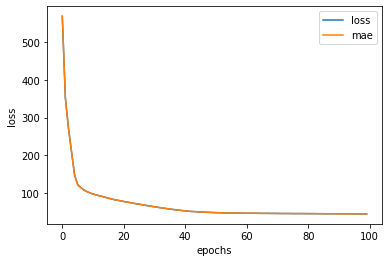

In [140]:
# Visualise the model's loss
pd.DataFrame(history3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [141]:
# Predict test results
y_pred3 = model3.predict(X_test_scaled)
y_pred3[:10]

173/173 [==============================] - 0s 2ms/step


array([[ 465.03815 ],
       [1383.0455  ],
       [ 310.86514 ],
       [ 649.3287  ],
       [  16.312994],
       [1558.1923  ],
       [ 286.7144  ],
       [ 472.7636  ],
       [1694.8376  ],
       [1728.2596  ]], dtype=float32)

In [142]:
# Calculate the mean absolute error, mean squared error and root mean squared error
mae3 = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred3))
mse3 = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred3))
rmse3 = tf.sqrt(mse3)

mae3, mse3, rmse3

(<tf.Tensor: shape=(), dtype=float32, numpy=45.907845>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4590.72>,
 <tf.Tensor: shape=(), dtype=float32, numpy=67.75485>)

### Comparison of metrics

In [143]:
# Summary of the model metrics
model_results = [
    ["Model 1", mae1.numpy(), mse1.numpy(), rmse1.numpy()],
    ["Model 2", mae2.numpy(), mse2.numpy(), rmse2.numpy()],
    ["Model 3", mae3.numpy(), mse3.numpy(), rmse3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE", "RMSE"])
all_results

,Model,MAE,MSE,RMSE
0,Model 1,273.206055,113963.585938,337.584930
1,Model 2,133.627594,50211.476562,224.079178
2,Model 3,45.907845,4590.720215,67.754852


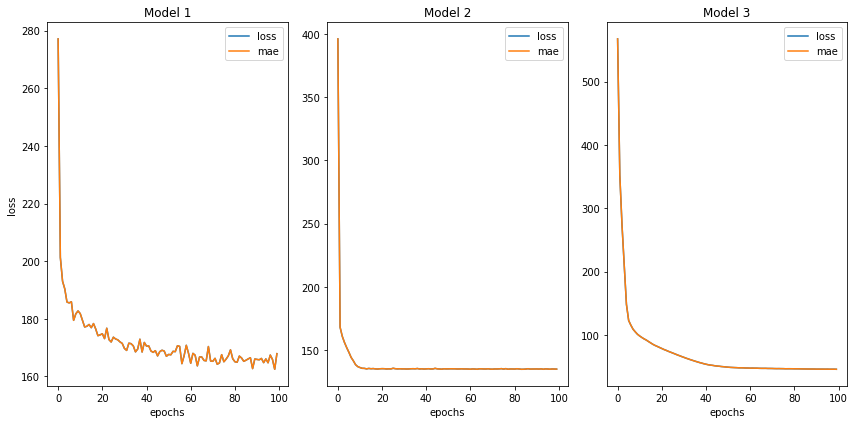

In [146]:
# Plot the loss curves for all models
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot for Model 1
axs[0].set_title("Model 1")
pd.DataFrame(history1.history).plot(ax=axs[0])
axs[0].set_ylabel("loss")
axs[0].set_xlabel("epochs")

# Plot for Model 2
axs[1].set_title("Model 2")
pd.DataFrame(history2.history).plot(ax=axs[1])
axs[1].set_xlabel("epochs")

# Plot for Model 3
axs[2].set_title("Model 3")
pd.DataFrame(history3.history).plot(ax=axs[2])
axs[2].set_xlabel("epochs")

plt.tight_layout()
plt.show()


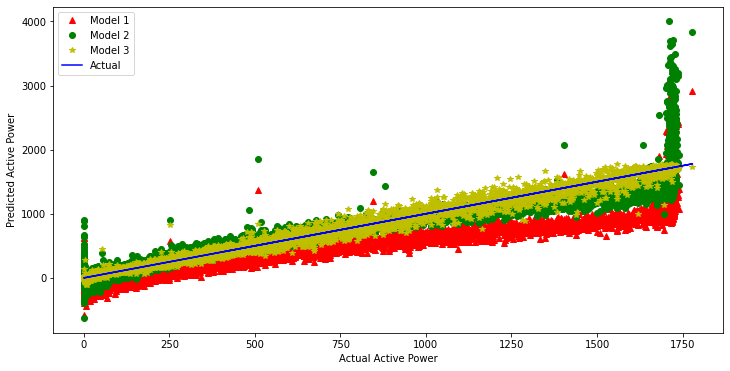

In [149]:
# Visualise the predicted values against the actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test, y_pred1, "r^", label="Model 1")
plt.plot(y_test, y_pred2, "go", label="Model 2")
plt.plot(y_test, y_pred3, "y*", label="Model 3")
plt.plot(y_test, y_test, "b", label="Actual")
plt.ylabel("Predicted Active Power")
plt.xlabel("Actual Active Power")
plt.legend()
plt.show()


# Classification - Predicting Fault situation

In [127]:
# Creating copy of dataset for Regression analysis
df_clas = df.copy()

In [128]:
# Count the number of missing values in each column
df_clas.isnull().sum()

ActivePower                     23474
AmbientTemperature              24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
RotorRPM                        56097
TurbineStatus                   55316
WindDirection                   45946
WindSpeed                       23629
dtype: int64

In [129]:
# Dropping rows with missing values
df_clas.dropna(axis=0, inplace=True)
df_clas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32728 entries, 70789 to 118223
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   32728 non-null  float64
 1   AmbientTemperature            32728 non-null  float64
 2   BearingShaftTemperature       32728 non-null  float64
 3   Blade1PitchAngle              32728 non-null  float64
 4   Blade2PitchAngle              32728 non-null  float64
 5   ControlBoxTemperature         32728 non-null  float64
 6   GearboxBearingTemperature     32728 non-null  float64
 7   GearboxOilTemperature         32728 non-null  float64
 8   GeneratorRPM                  32728 non-null  float64
 9   GeneratorWinding1Temperature  32728 non-null  float64
 10  GeneratorWinding2Temperature  32728 non-null  float64
 11  HubTemperature                32728 non-null  float64
 12  MainBoxTemperature            32728 non-null  float64
 

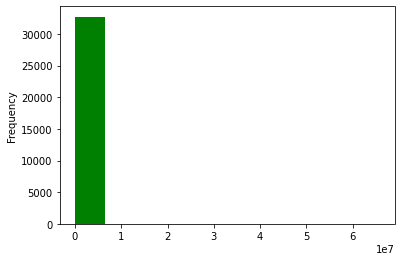

In [130]:
# Visualise distribution of data in TurbineStatus column
df_clas['TurbineStatus'].plot.hist(color='green')
plt.show()

In [131]:
# Value counts of Turbine Status codes reported more than 50 times
df_clas.TurbineStatus.value_counts()[df_clas.TurbineStatus.value_counts() > 50]

2.0        28686
1.0         1080
16384.0      622
3.0          536
512.0        181
4.0          113
8192.0       107
1024.0        53
Name: TurbineStatus, dtype: int64

In [133]:
# Applying the function to TurbineFault column
df_clas["TurbineFault"] = df_clas["TurbineStatus"].apply(turbine_fault)
df_clas.drop(["TurbineStatus"], axis=1, inplace=True)

In [134]:
# Value counts of Turbine fault / no-fault classes
df_clas.TurbineFault.value_counts()

0    29784
1     2944
Name: TurbineFault, dtype: int64

In [150]:
# Drop ActivePower column
df_clas.drop(["ActivePower"], axis=1, inplace=True)

In [170]:
# Applying the function to WindDirection column
df_clas["WindDirection_360"] = df_clas["WindDirection"].apply(wind_direction)
df_clas.drop(["WindDirection"], axis=1, inplace=True)

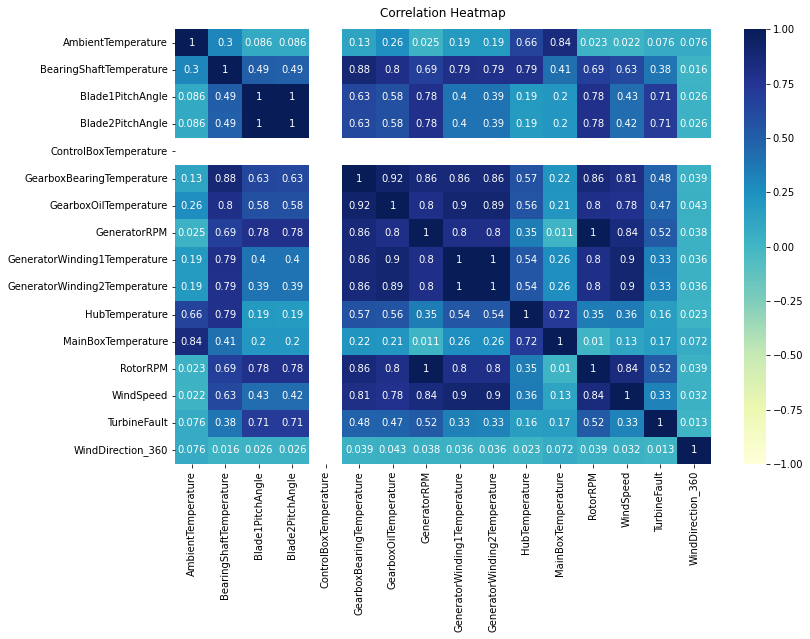

In [171]:
# Create and visualise correlation matrix
corr_matrix = df_clas.corr().abs()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

In [173]:
# Dropping AmbientTemperature and WindDirection_360 columns
df_clas.drop(["AmbientTemperature", "WindDirection_360"], axis=1, inplace=True)

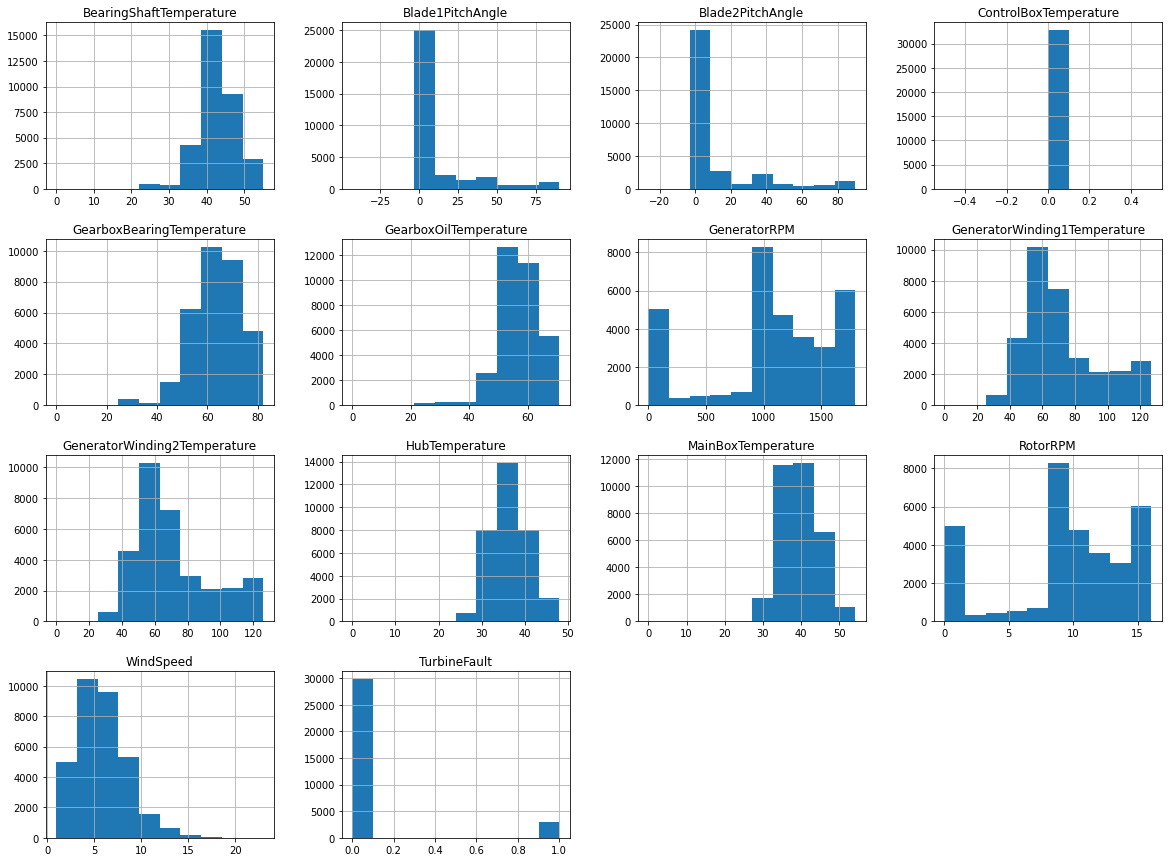

In [174]:
# Data distribution charts
df_clas.hist(figsize=(20, 15))
plt.show()

### Model 1

In [175]:
# Creating label and features
y = df_clas["TurbineFault"]
X = df_clas.drop(["TurbineFault"], axis=1)

In [176]:
# Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(32728, 26182, 6546, 32728, 26182, 6546)

In [177]:
# Create neural network model with 2 hidden layers
tf.random.set_seed(42)
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [178]:
# Compile the model with SGD optimizer
model1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

In [157]:
# Fit the model
history1 = model1.fit(X_train, y_train, epochs=100)

Epoch 1/100
819/819 [==============================] - 4s 3ms/step - loss: 1.3627 - accuracy: 0.9116
Epoch 2/100
819/819 [==============================] - 2s 3ms/step - loss: 1.3603 - accuracy: 0.9118
Epoch 3/100
819/819 [==============================] - 2s 3ms/step - loss: 1.3603 - accuracy: 0.9118
Epoch 4/100
819/819 [==============================] - 2s 2ms/step - loss: 1.3603 - accuracy: 0.9118
Epoch 5/100
819/819 [==============================] - 2s 2ms/step - loss: 1.3603 - accuracy: 0.9118
Epoch 6/100
819/819 [==============================] - 2s 3ms/step - loss: 1.3603 - accuracy: 0.9118
Epoch 7/100
819/819 [==============================] - 2s 2ms/step - loss: 1.3603 - accuracy: 0.9118
Epoch 8/100
819/819 [==============================] - 2s 3ms/step - loss: 1.3603 - accuracy: 0.9118
Epoch 9/100
819/819 [==============================] - 3s 3ms/step - loss: 1.3603 - accuracy: 0.9118
Epoch 10/100
819/819 [==============================] - 2s 3ms/step - loss: 1.3603 - accura

Text(0.5, 0, 'epochs')

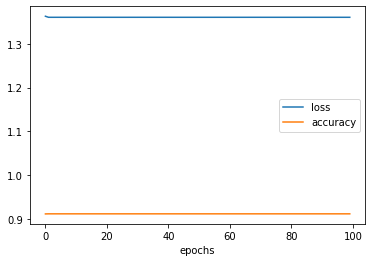

In [158]:
# Visualise the model's accuracy
pd.DataFrame(history1.history).plot()
plt.xlabel("epochs")

In [193]:
# Predict test results
y_pred1 = model1.predict(X_test)
y_pred1[:10]

205/205 [==============================] - 1s 2ms/step


array([[-481.08313],
       [-517.1152 ],
       [-520.4204 ],
       [-587.10376],
       [-445.42715],
       [-682.849  ],
       [-218.84537],
       [-441.4541 ],
       [-588.932  ],
       [-654.73987]], dtype=float32)

In [190]:
# Calculate the accuracy
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print(f"Model's loss: {loss1}")
print(f"Model's accuracy: {(accuracy1 * 100):.2f}%")

205/205 [==============================] - 1s 2ms/step - loss: 0.7740 - accuracy: 0.9493
Model's loss: 0.7739633917808533
Model's accuracy: 94.93%


### Model 2

In [179]:
# Create neural network model with 3 hidden layers
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [180]:
# Compile the model with Adam optimizer
model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [164]:
# Fit the model
history2 = model2.fit(X_train, y_train, epochs=100)

Epoch 1/100
819/819 [==============================] - 4s 3ms/step - loss: 0.9291 - accuracy: 0.9391
Epoch 2/100
819/819 [==============================] - 3s 3ms/step - loss: 0.7460 - accuracy: 0.9510
Epoch 3/100
819/819 [==============================] - 3s 3ms/step - loss: 0.6322 - accuracy: 0.9587
Epoch 4/100
819/819 [==============================] - 3s 3ms/step - loss: 0.6655 - accuracy: 0.9563
Epoch 5/100
819/819 [==============================] - 3s 3ms/step - loss: 0.6221 - accuracy: 0.9594
Epoch 6/100
819/819 [==============================] - 2s 3ms/step - loss: 0.7354 - accuracy: 0.9518
Epoch 7/100
819/819 [==============================] - 3s 4ms/step - loss: 0.6591 - accuracy: 0.9570
Epoch 8/100
819/819 [==============================] - 3s 3ms/step - loss: 0.6424 - accuracy: 0.9582
Epoch 9/100
819/819 [==============================] - 3s 3ms/step - loss: 0.6233 - accuracy: 0.9594
Epoch 10/100
819/819 [==============================] - 3s 3ms/step - loss: 0.7184 - accura

Text(0.5, 0, 'epochs')

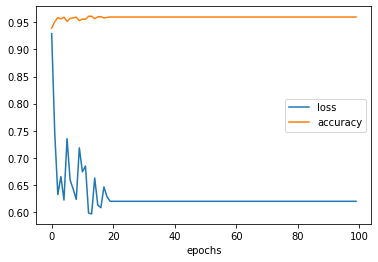

In [165]:
# Visualise the model's accuracy
pd.DataFrame(history2.history).plot()
plt.xlabel("epochs")

In [194]:
# Predict test results
y_pred2 = model2.predict(X_test)
y_pred2[:10]

205/205 [==============================] - 1s 2ms/step


array([[-264.63284],
       [-283.29413],
       [-286.07956],
       [-321.1211 ],
       [-246.42178],
       [-372.40796],
       [-134.3349 ],
       [-244.49837],
       [-321.4114 ],
       [-355.03427]], dtype=float32)

In [189]:
# Calculate the accuracy
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f"Model's loss: {loss2}")
print(f"Model's accuracy: {(accuracy2 * 100):.2f}%")


205/205 [==============================] - 1s 2ms/step - loss: 1.4963 - accuracy: 0.9030
Model's loss: 1.4963089227676392
Model's accuracy: 90.30%


### Model 3

In [181]:
# Checking the dataset's features
X.head(2)

,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,RotorRPM,WindSpeed
70789,47.154927,45.736893,43.699357,0.0,58.852308,56.782879,68.210284,62.792258,62.145290,46.003815,49.171875,0.672715,2.212693
70791,40.058399,41.260297,41.260230,0.0,48.911180,56.033333,68.229411,61.747975,61.282616,40.253338,44.515622,0.508198,2.130019


In [182]:
# Normalise the dataset's features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
# Check few rows of scaled dataset
X_train_scaled[:2], X_test_scaled[:2]

(array([[0.75182663, 0.32853364, 0.2366153 , 0.        , 0.74168516,
         0.77294424, 0.57716971, 0.44288958, 0.43987117, 0.72930411,
         0.70067051, 0.57730097, 0.13663456],
        [0.78791109, 0.32042042, 0.22888972, 0.        , 0.79899597,
         0.82894056, 0.58065263, 0.50649814, 0.5026614 , 0.79165011,
         0.83582848, 0.58109362, 0.16791399]]),
 array([[0.74249645, 0.316037  , 0.22239611, 0.        , 0.78153662,
         0.79831626, 0.6248099 , 0.49153347, 0.48768566, 0.77071633,
         0.71749913, 0.62491773, 0.21913289],
        [0.83109216, 0.31566006, 0.22229753, 0.        , 0.79331031,
         0.82283688, 0.67078347, 0.5494481 , 0.5464524 , 0.83347906,
         0.75545046, 0.67096532, 0.24448706]]))

In [183]:
# Create neural network model with 3 hidden layers
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [185]:
# Compile the model
model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [186]:
# Fit the model with normalised data
history3 = model3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
819/819 [==============================] - 6s 4ms/step - loss: 0.1527 - accuracy: 0.9519
Epoch 2/100
819/819 [==============================] - 3s 3ms/step - loss: 0.1245 - accuracy: 0.9591
Epoch 3/100
819/819 [==============================] - 3s 3ms/step - loss: 0.1119 - accuracy: 0.9607
Epoch 4/100
819/819 [==============================] - 3s 3ms/step - loss: 0.1043 - accuracy: 0.9612
Epoch 5/100
819/819 [==============================] - 3s 3ms/step - loss: 0.1008 - accuracy: 0.9602
Epoch 6/100
819/819 [==============================] - 2s 3ms/step - loss: 0.0982 - accuracy: 0.9617
Epoch 7/100
819/819 [==============================] - 3s 3ms/step - loss: 0.0969 - accuracy: 0.9617
Epoch 8/100
819/819 [==============================] - 3s 3ms/step - loss: 0.0954 - accuracy: 0.9619
Epoch 9/100
819/819 [==============================] - 2s 3ms/step - loss: 0.0946 - accuracy: 0.9624
Epoch 10/100
819/819 [==============================] - 2s 3ms/step - loss: 0.0936 - accura

Text(0.5, 0, 'epochs')

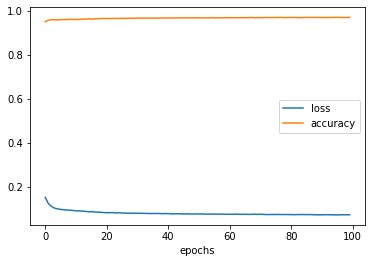

In [187]:
# Visualise the model's accuracy
pd.DataFrame(history3.history).plot()
plt.xlabel("epochs")

In [195]:
# Predict test results
y_pred3 = model3.predict(X_test_scaled)
y_pred3[:10]

205/205 [==============================] - 1s 2ms/step


array([[4.55526897e-05],
       [3.87764194e-05],
       [2.54933020e-05],
       [1.31453735e-05],
       [2.69948505e-03],
       [3.93824826e-04],
       [1.28121883e-01],
       [4.48188558e-02],
       [3.06769980e-05],
       [1.95198518e-05]], dtype=float32)

In [188]:
# Calculate the accuracy
loss3, accuracy3 = model3.evaluate(X_test_scaled, y_test)
print(f"Model's loss: {loss3}")
print(f"Model's accuracy: {(accuracy3 * 100):.2f}%")

205/205 [==============================] - 1s 2ms/step - loss: 0.0869 - accuracy: 0.9650
Model's loss: 0.08693113178014755
Model's accuracy: 96.50%


In [209]:
# Accuracy, precision, recall and F1 score metrics
accuracy = accuracy_score(y_test, tf.round(y_pred3))
precision = precision_score(y_test, tf.round(y_pred3))
recall = recall_score(y_test, tf.round(y_pred3))
f1 = f1_score(y_test, tf.round(y_pred3))

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.89
Recall: 0.73
F1 score: 0.80


### Comparison of metrics

In [191]:
# Summary of the model metrics
model_results = [
    ["Model 1", loss1, accuracy1],
    ["Model 2", loss2, accuracy2],
    ["Model 3", loss3, accuracy3]
]

all_results = pd.DataFrame(model_results, columns=["Model", "Loss", "Accuracy"])
all_results

,Model,Loss,Accuracy
0,Model 1,0.773963,0.949282
1,Model 2,1.496309,0.902994
2,Model 3,0.086931,0.965017


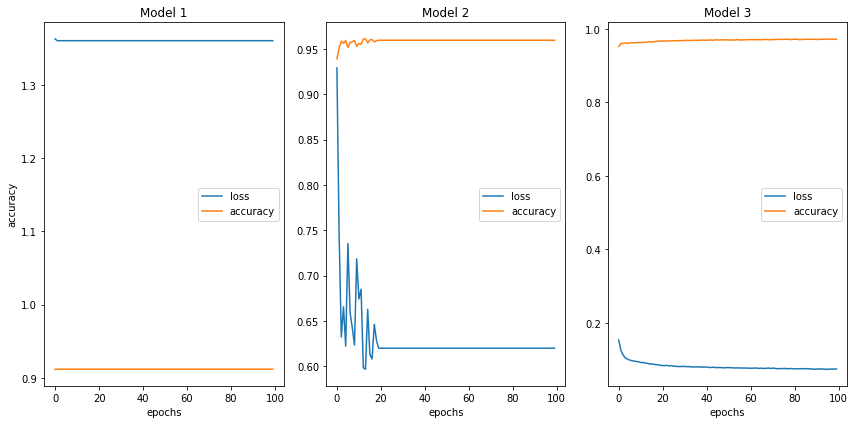

In [192]:
# Plot the accuracy curves for all models
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plot for Model 1
axs[0].set_title("Model 1")
pd.DataFrame(history1.history).plot(ax=axs[0])
axs[0].set_ylabel("accuracy")
axs[0].set_xlabel("epochs")

# Plot for Model 2
axs[1].set_title("Model 2")
pd.DataFrame(history2.history).plot(ax=axs[1])
axs[1].set_xlabel("epochs")

# Plot for Model 3
axs[2].set_title("Model 3")
pd.DataFrame(history3.history).plot(ax=axs[2])
axs[2].set_xlabel("epochs")

plt.tight_layout()
plt.show()

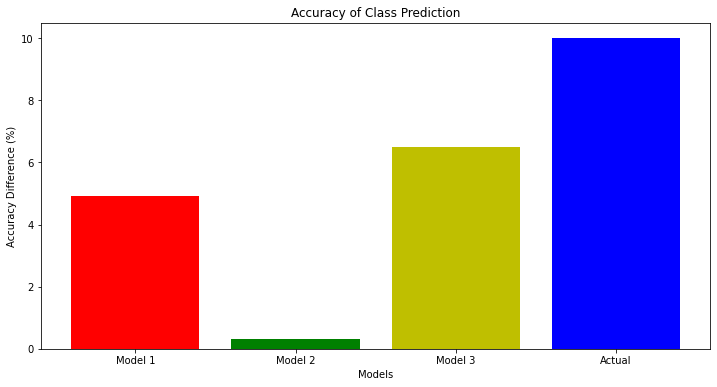

In [206]:
# Visualising the accuracy difference between models
plt.figure(figsize=(12, 6))
ratios = [accuracy1, accuracy2, accuracy3, 1]
factor = 100
ratios = [(ratio - 0.9) * factor for ratio in ratios]
plt.bar(["Model 1", "Model 2", "Model 3", "Actual"], ratios, color=["r", "g", "y", "b"])
plt.ylabel("Accuracy Difference (%)")
plt.xlabel("Models")
plt.title("Accuracy of Class Prediction")
plt.show()
